<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/Feature_Selection_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of titanic_train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [17]:
x_train, x_test, y_train,y_test = train_test_split(df.drop(labels=['Survived'], axis=1), df['Survived'], test_size=0.3, random_state=42)
numeric_x_train = x_train.select_dtypes(include=[np.number])
constant_features = [
    features
    for features in numeric_x_train.columns
    if numeric_x_train[features].std() == 0
    ]

print('No of Constant features : ',len(constant_features))
print(constant_features)

No of Constant features :  0
[]


In [23]:
quassi_constant = []

for feature in numeric_x_train.columns:
  predominant = (numeric_x_train[feature].value_counts()/ float(len(numeric_x_train))).sort_values(ascending=False).values[0]
  if predominant > 0.90:
    quassi_constant.append(feature)

print('No of Quassi Constant features : ',len(quassi_constant))
print(quassi_constant)

No of Quassi Constant features :  0
[]


In [28]:
duplicate_feature = []


for col1 in range(0,len(numeric_x_train.columns)):
  for col2 in range(col1+1,len(numeric_x_train.columns)):
    if (numeric_x_train.iloc[:, col1].equals(numeric_x_train.iloc[:, col2])):
      duplicate_feature.append(numeric_x_train.columns[col1])

print('No of Duplicate features : ',len(duplicate_feature))
print(duplicate_feature)

No of Duplicate features :  0
[]


In [30]:
duplicate_feature = []


for col1 in range(0,len(x_train.columns)):
  for col2 in range(col1+1,len(x_train.columns)):
    if (x_train.iloc[:, col1].equals(x_train.iloc[:, col2])):
      duplicate_feature.append(x_train.columns[col1])

print('No of Duplicate features : ',len(duplicate_feature))
print(duplicate_feature)

No of Duplicate features :  0
[]


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64
Series([], dtype: float64)


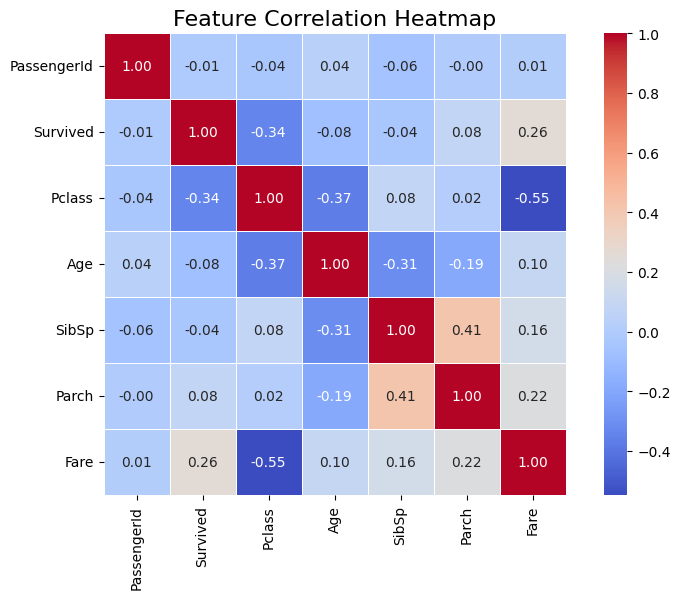

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of titanic_train.csv')
df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df.corr()

target_corr = corr_matrix['Survived'].sort_values(ascending=False)
print(target_corr)


threshold = 0.55
core_pair = corr_matrix.unstack()
high_corr = core_pair[(abs(core_pair)>threshold) & (core_pair != 1)]
print(high_corr)




plt.figure(figsize=(10, 6))

# 3. Draw the heatmap
sns.heatmap(
    corr_matrix,                  # data
    annot=True,                   # show correlation values
    cmap='coolwarm',               # color scheme
    fmt=".2f",                     # number format
    linewidths=0.5,                # space between squares
    square=True                    # keep boxes square
)

# 4. Add title and show
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()
